In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv(r"/content/cardio_train.csv", sep=';')

In [4]:
data['age'] = (data['age'] / 365).astype(int)

In [5]:
data = data[(data['ap_hi'] > 90) & (data['ap_hi'] < 180)]
data = data[(data['ap_lo'] > 60) & (data['ap_lo'] < 120)]

In [6]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0


In [7]:
data.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [8]:
X = data.drop(columns=['id', 'cardio'])
y = data['cardio']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

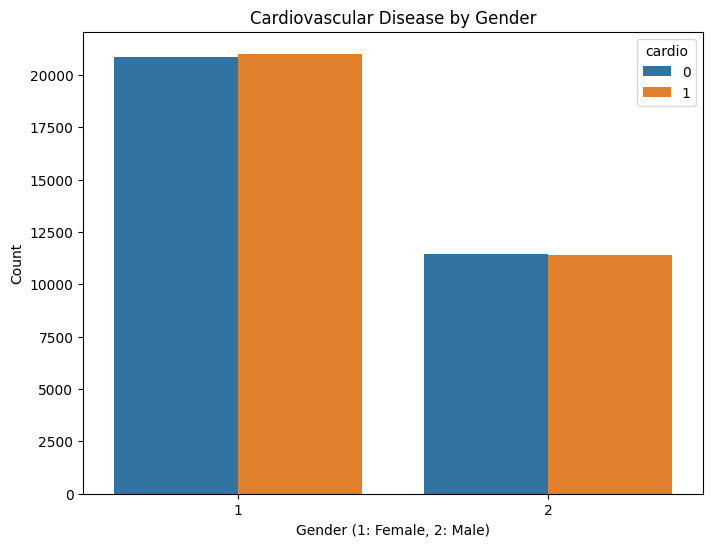

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='cardio', data=data)
plt.title('Cardiovascular Disease by Gender')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Count')
plt.show()

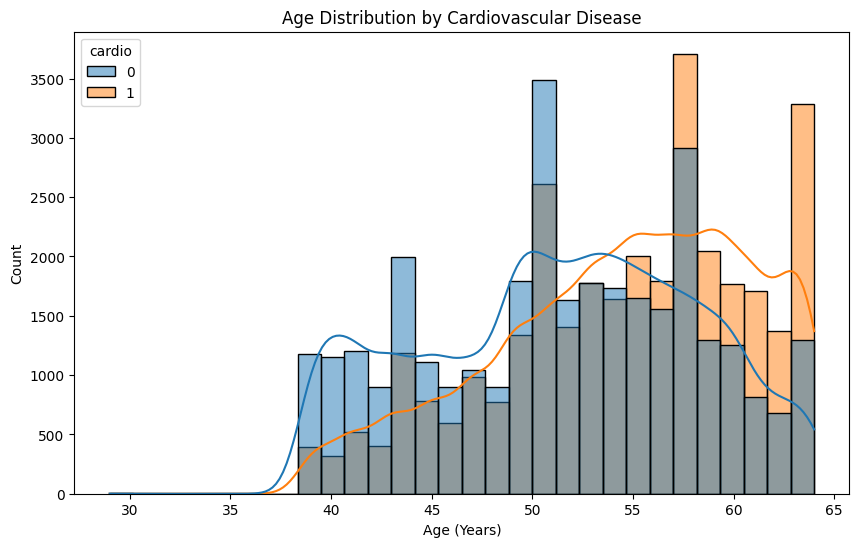

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='cardio', bins=30, kde=True)
plt.title('Age Distribution by Cardiovascular Disease')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

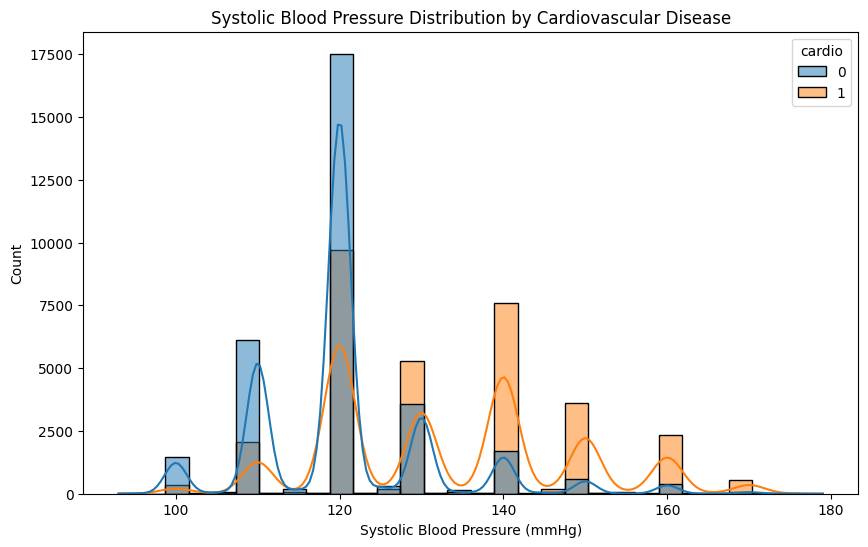

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='ap_hi', hue='cardio', bins=30, kde=True)
plt.title('Systolic Blood Pressure Distribution by Cardiovascular Disease')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

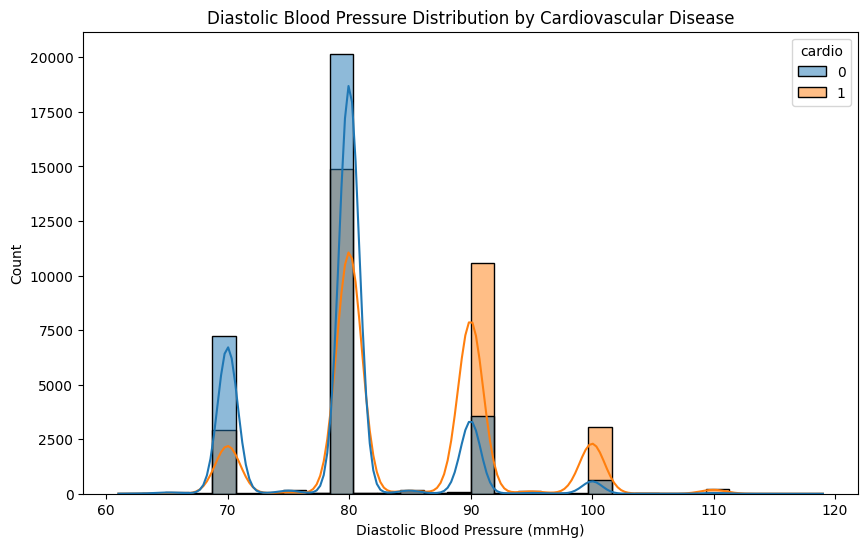

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='ap_lo', hue='cardio', bins=30, kde=True)
plt.title('Diastolic Blood Pressure Distribution by Cardiovascular Disease')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

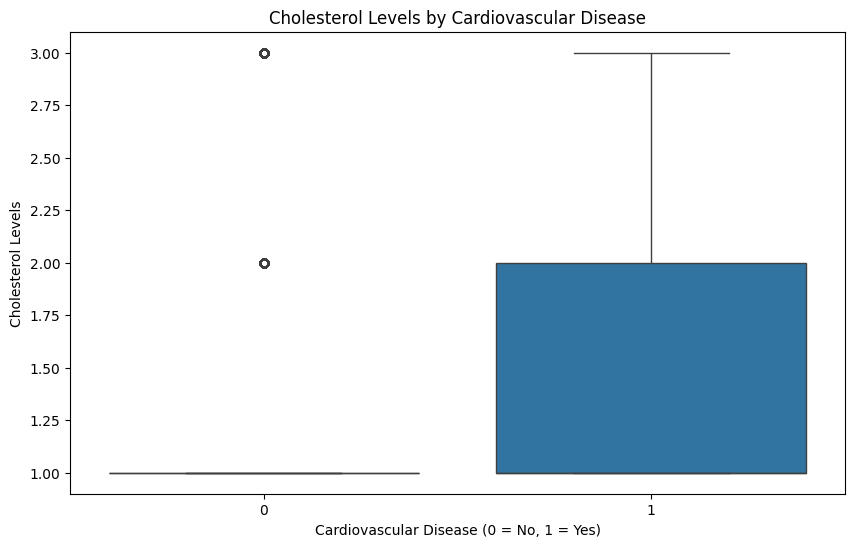

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='cholesterol', data=data)
plt.title('Cholesterol Levels by Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels')
plt.show()

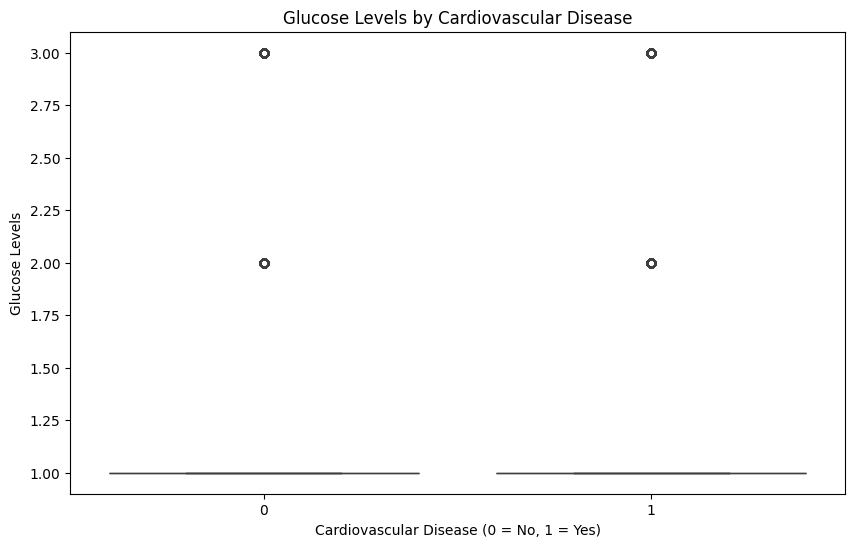

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='gluc', data=data)
plt.title('Glucose Levels by Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Glucose Levels')
plt.show()

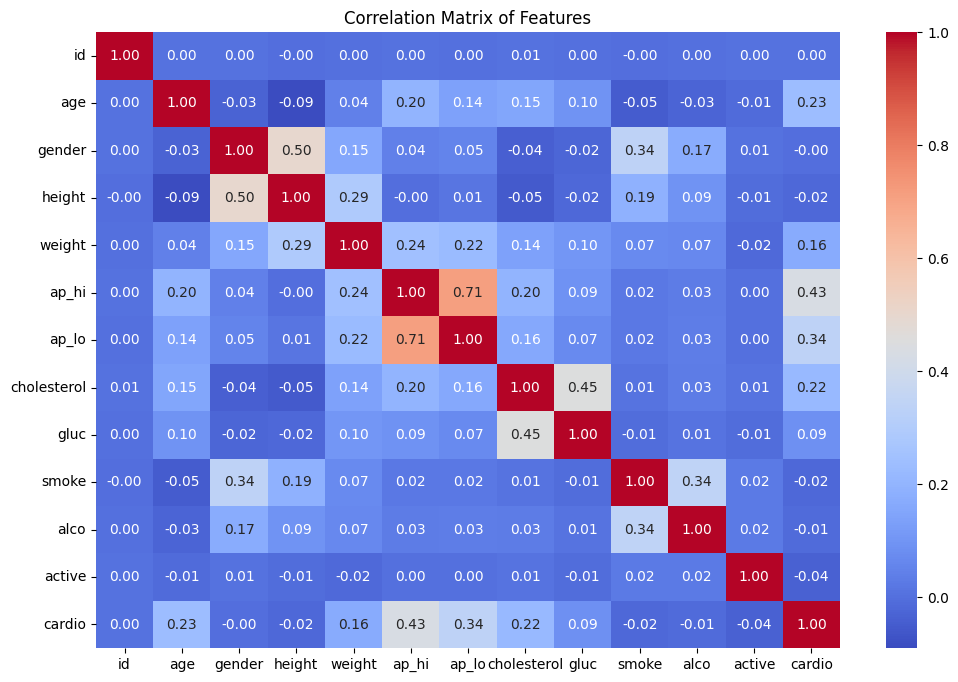

In [16]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
model_accuracies = {}

In [19]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
model_accuracies['SVM'] = svm_accuracy

In [20]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
model_accuracies['KNN'] = knn_accuracy

In [21]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
model_accuracies['Decision Tree'] = dt_accuracy

In [22]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
model_accuracies['Logistic Regression'] = lr_accuracy

In [23]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
model_accuracies['Random Forest'] = rf_accuracy

In [24]:
for model_name, accuracy in model_accuracies.items():
    print(f'{model_name}: {accuracy * 100:.2f}%')

SVM: 73.07%
KNN: 69.31%
Decision Tree: 63.37%
Logistic Regression: 72.73%
Random Forest: 70.67%


In [25]:
svm_model_final = SVC()
svm_model_final.fit(X_train, y_train)

SVC()

In [26]:
y_pred_final_svm = svm_model_final.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
accuracy_final_svm = accuracy_score(y_test, y_pred_final_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_final_svm)
class_report_svm = classification_report(y_test, y_pred_final_svm)

Final SVM Model Accuracy: 73.07%
Confusion Matrix:
[[5052 1313]
 [2172 4404]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6365
           1       0.77      0.67      0.72      6576

    accuracy                           0.73     12941
   macro avg       0.73      0.73      0.73     12941
weighted avg       0.74      0.73      0.73     12941



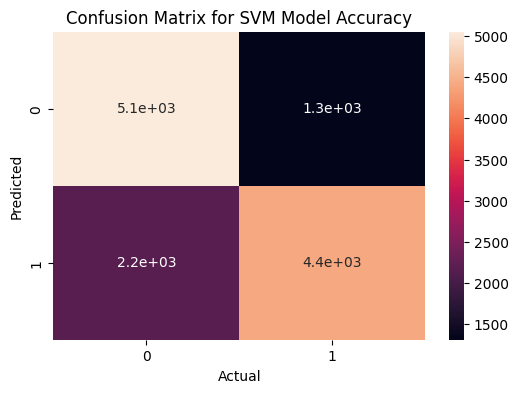

In [31]:
print(f'Final SVM Model Accuracy: {accuracy_final_svm * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('\nClassification Report:')
print(class_report_svm)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm,annot=True)
plt.title(f'Confusion Matrix for SVM Model Accuracy')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()